In [1]:
import pandas as pd
data = pd.read_csv('Stock_Prices (1).csv')
print(data.head())


         Date  ClosingPrice   HighPrice    LowPrice  Volume  MarketIndex
0  2020-01-01    101.764052  102.877908   97.502907   54529   499.868247
1  2020-01-02    102.164210  104.973498  100.482640   24590   500.461453
2  2020-01-03    103.142948  107.744892   98.602801   54406   501.596404
3  2020-01-04    105.383841  106.555576  101.130727   62652   499.305580
4  2020-01-05    107.251399  107.805419  103.756775   32728   500.186152


In [2]:
print(data.info())
print(data.isnull().sum())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1096 non-null   object 
 1   ClosingPrice  1096 non-null   float64
 2   HighPrice     1096 non-null   float64
 3   LowPrice      1096 non-null   float64
 4   Volume        1096 non-null   int64  
 5   MarketIndex   1096 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 51.5+ KB
None
Date            0
ClosingPrice    0
HighPrice       0
LowPrice        0
Volume          0
MarketIndex     0
dtype: int64
       ClosingPrice    HighPrice     LowPrice        Volume  MarketIndex
count   1096.000000  1096.000000  1096.000000   1096.000000  1096.000000
mean      76.986119    79.506866    74.445358  54471.208942   506.798963
std       26.384561    26.476108    26.402910  25977.276871    12.355941
min       33.409210    33.946333    30.392513  10043.000000   476.792

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2020-01-01 to 2022-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ClosingPrice  1096 non-null   float64
 1   HighPrice     1096 non-null   float64
 2   LowPrice      1096 non-null   float64
 3   Volume        1096 non-null   int64  
 4   MarketIndex   1096 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 51.4 KB
None


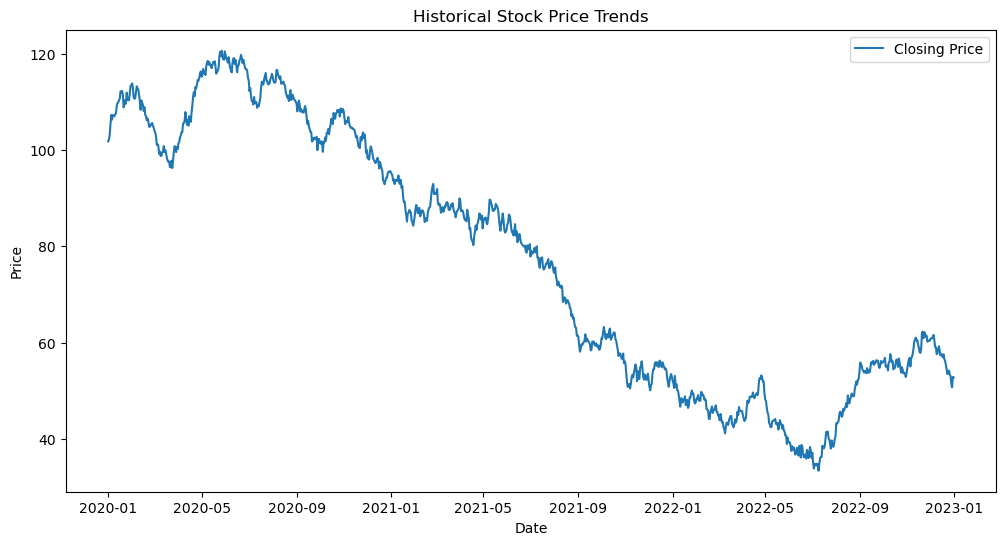

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
plt.plot(data.index, data['ClosingPrice'], label='Closing Price')
plt.title('Historical Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


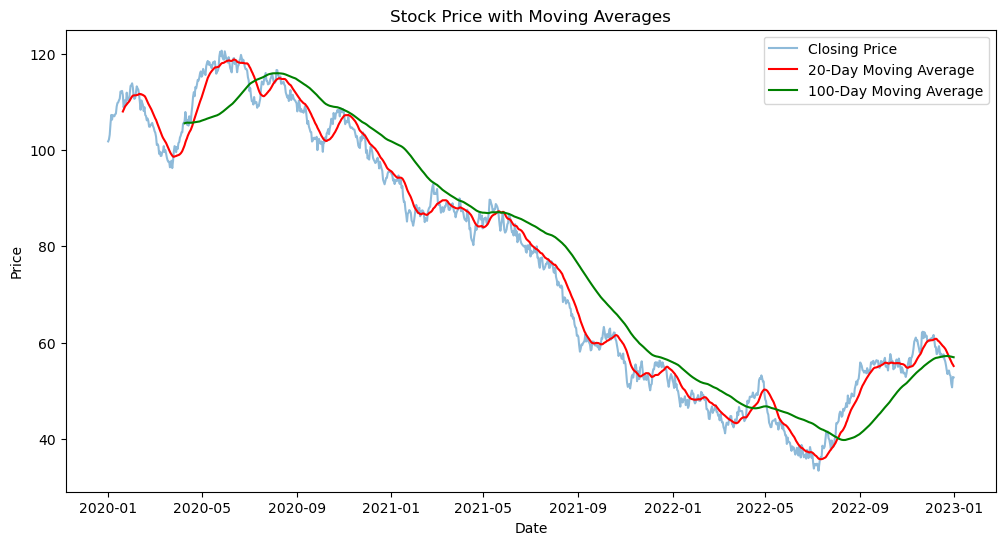

In [8]:
data['20_MA'] = data['ClosingPrice'].rolling(window=20).mean()
data['100_MA'] = data['ClosingPrice'].rolling(window=100).mean()
plt.figure(figsize=(12,6))
plt.plot(data.index, data['ClosingPrice'], label='Closing Price', alpha=0.5)
plt.plot(data.index, data['20_MA'], label='20-Day Moving Average', color='red')
plt.plot(data.index, data['100_MA'], label='100-Day Moving Average', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


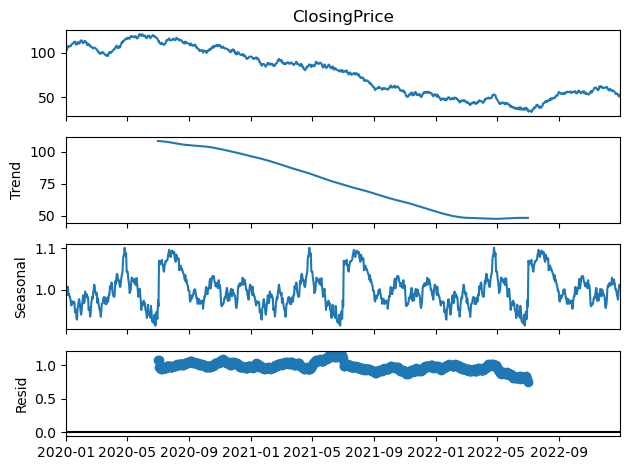

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['ClosingPrice'], model='multiplicative', period=365)
decomposition.plot()
plt.show()


              ClosingPrice    Volume
ClosingPrice      1.000000 -0.001785
Volume           -0.001785  1.000000


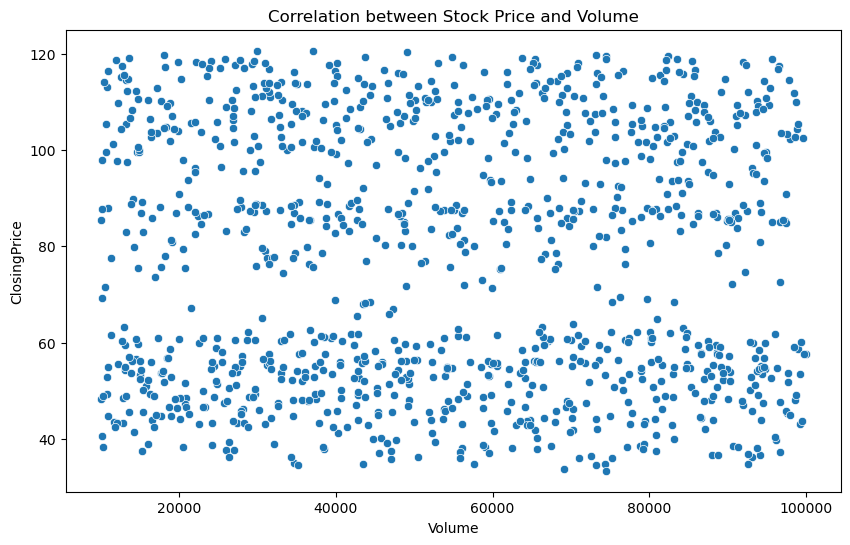

In [10]:
correlation_matrix = data[['ClosingPrice', 'Volume']].corr()
print(correlation_matrix)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Volume', y='ClosingPrice', data=data)
plt.title('Correlation between Stock Price and Volume')
plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['ClosingPrice'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -0.6310168352540185
p-value: 0.8638183590794388


C:\Users\akshata landge\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\akshata landge\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\akshata landge\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-01-01    52.856611
2023-01-02    52.996060
2023-01-03    52.897440
2023-01-04    52.877377
2023-01-05    52.879688
2023-01-06    52.867785
2023-01-07    52.870028
2023-01-08    52.872331
2023-01-09    52.872025
2023-01-10    52.872682
2023-01-11    52.872818
2023-01-12    52.872667
2023-01-13    52.872678
2023-01-14    52.872654
2023-01-15    52.872633
2023-01-16    52.872639
2023-01-17    52.872639
2023-01-18    52.872640
2023-01-19    52.872641
2023-01-20    52.872641
2023-01-21    52.872641
2023-01-22    52.872641
2023-01-23    52.872641
2023-01-24    52.872641
2023-01-25    52.872641
2023-01-26    52.872641
2023-01-27    52.872641
2023-01-28    52.872641
2023-01-29    52.872641
2023-01-30    52.872641
Freq: D, Name: predicted_mean, dtype: float64


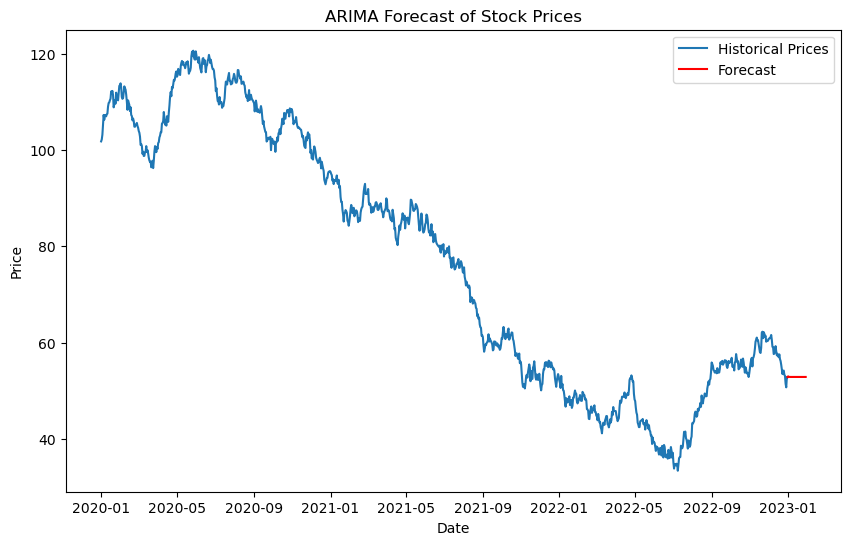

In [12]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(data['ClosingPrice'], order=(5,1,0))
arima_model = model.fit()

forecast = arima_model.forecast(steps=30)
print(forecast)


plt.figure(figsize=(10,6))
plt.plot(data.index, data['ClosingPrice'], label='Historical Prices')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
